In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
cancer =  pd.read_csv("/Users/olaabdelrazeq/Desktop/data.csv",index_col=False)

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.5, 1.0, 'Count of different values')

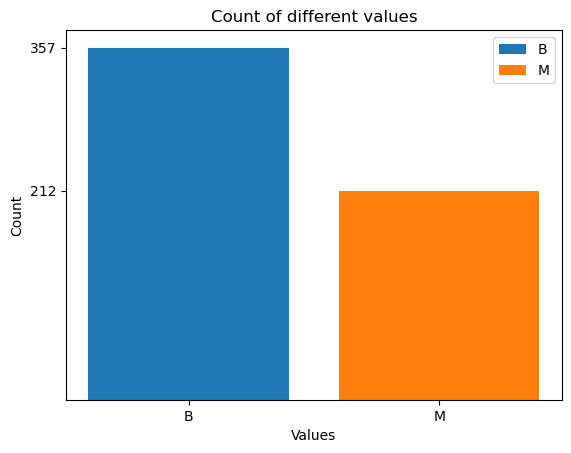

In [4]:
d = cancer["diagnosis"].value_counts()
keys = d.keys()
values = d.values
for k in keys:
    plt.bar(k,d[k], label = k)
plt.legend()
plt.xlabel('Values')
plt.ylabel('Count')
plt.xticks(keys)
plt.yticks(values)
plt.title('Count of different values')

<Axes: >

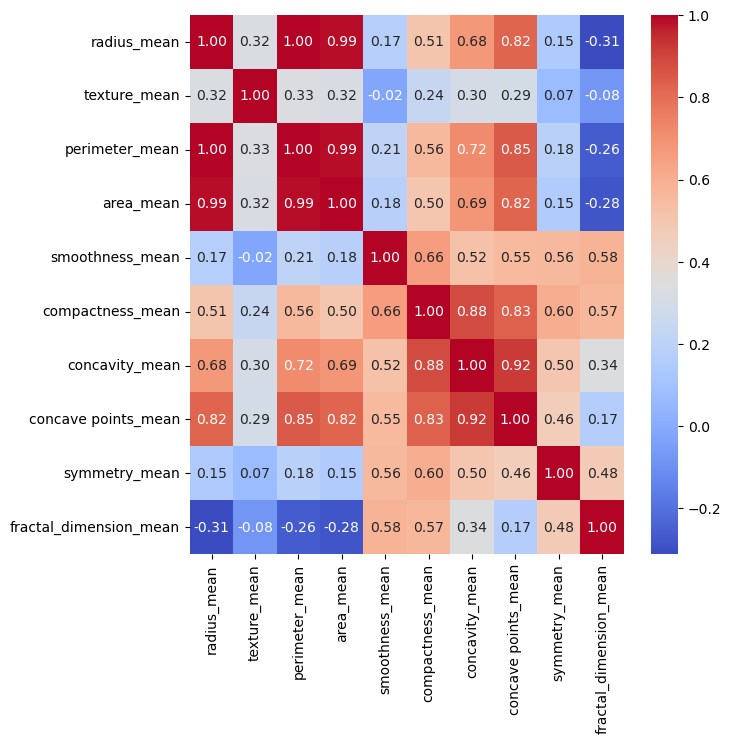

In [5]:
numeric_data = cancer.iloc[:, 1:12].select_dtypes(include='number')
cor = numeric_data.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')

In [6]:
cancer.drop("id", axis=1, inplace= True)

In [7]:
LabelEncoder_y = LabelEncoder()
cancer['diagnosis'] = LabelEncoder_y.fit_transform(cancer['diagnosis'].values)

In [8]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
x = cancer.loc[:, cancer.columns != 'diagnosis']
y = cancer['diagnosis']
x = x.values
y = y.values

In [10]:
x_train,x_test,y_train, y_test = train_test_split (x,y,test_size = 0.25, random_state=0)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (426, 30)
y_train shape: (426,)
x_test shape: (143, 30)
y_test shape: (143,)


In [11]:
x_train[0]

array([1.185e+01, 1.746e+01, 7.554e+01, 4.327e+02, 8.372e-02, 5.642e-02,
       2.688e-02, 2.280e-02, 1.875e-01, 5.715e-02, 2.070e-01, 1.238e+00,
       1.234e+00, 1.388e+01, 7.595e-03, 1.500e-02, 1.412e-02, 8.578e-03,
       1.792e-02, 1.784e-03, 1.306e+01, 2.575e+01, 8.435e+01, 5.178e+02,
       1.369e-01, 1.758e-01, 1.316e-01, 9.140e-02, 3.101e-01, 7.007e-02])

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
x_train[0]

array([-0.65079907, -0.43057322, -0.68024847, -0.62698309, -0.91381897,
       -0.93335153, -0.78763077, -0.67944444,  0.25404078, -0.79877182,
       -0.68958948,  0.04723809, -0.78036299, -0.55337361,  0.21546423,
       -0.59450332, -0.55964264, -0.52889336, -0.30718648, -0.73414209,
       -0.6661438 ,  0.01849243, -0.68117939, -0.63150142,  0.19196229,
       -0.50775064, -0.69592933, -0.36433881,  0.32349851, -0.7578486 ])

In [14]:
def models(x_train, y_train):
    
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)

    # Decision Tree
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(x_train, y_train)

    # Random Forest
    forest = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)
    forest.fit(x_train, y_train)

    # Printing the accuracy of each model
    print(f"Logistic regression - train accuracy: {log.score(x_train, y_train)}")
    print(f"Decision tree - train accuracy:       {tree.score(x_train, y_train)}")
    print(f"Random forest - train accuracy:       {forest.score(x_train, y_train)}")

    output = [
           {
            'name' : 'Logistic Regression',
            'model': log
            },
           {
            'name' : 'Decision Tree',
            'model': tree
            },
           {
            'name' : 'Random Forest',
            'model': forest
            },
    ]
    return output

trained_models = models(x_train, y_train)

Logistic regression - train accuracy: 0.9906103286384976
Decision tree - train accuracy:       1.0
Random forest - train accuracy:       1.0


In [15]:
for model in trained_models:

    print(f"Model: {model['name']}")
    print("Classification Report: ")
    print(classification_report(y_test, model['model'].predict(x_test)))
    print("Accuracy Score: ", accuracy_score(y_test, model['model'].predict(x_test)))
    print("******************************************************")

Model: Logistic Regression
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score:  0.958041958041958
******************************************************
Model: Decision Tree
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score:  0.958041958041958
******************************************************
Model: Random Forest
Classification Report: 
              precision  